<a href="https://colab.research.google.com/github/noeam/Simulacion_Montecarlo/blob/develop/Montecarlo_Numerico2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center">Proyecto Final</h3>
  <h1 align="center"><b>Simulación de Montecarlo</b></h1>
</font>
<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="center">Alumno: Noe E. Amador González</h3>
  <h3 align="center">No. cuenta: 419004815</h3>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Ángel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico 2021-1</i></h5>
</font>

**Resumen**

En este colab se mostrará una aplicación del Método de Montecarlo para estimar probabilidades. 

La idea principal de este trabajo es poder explicar cómo funciona este método en la teoría de la probabilidad. Se explicará brevemente qué hay detrás de la implementación (como la generación de números aleatorios) y se desarrollará el código necesario sin utilizar librerias que hagan todo el trabajo para entender desde la raíz y de manera intuitiva la aplicación de este método.

Finalmente se mostrará una aplicación del método y se comprobará que todo lo planteado en realidad funciona.

# Introducción

El método de Montecarlo es una herramienta muy utilizada en la prática para campos relacionados con Simulación Estocástica, Probabilidad y Estadística. Su enorme capacidad esta fundamentada justamente en la Teoria de la Probabilidad, pero las características computacionales que posee también son una parte importante por la que este método se distingue.

Conocer el Método de Montecarlo nos permitirá aumentar nuestras herramienta de modelación matemática y en el mejor de los casos nos dará soluciones a problemas complejos.

La intuición detrás de este método es que podemos imaginar que queremos modelar un fenómeno físico, social o de cualquier índole. El problema es que este fenómeno tiene muchas interpretaciones y es difícil determinar cuál de todas estas interpretaciones es la más "general". Bueno, pues el Método de Montecarlo funciona para dar la interpretación (aproximación) tan certera como queramos a dicho fenómeno. Su magia radica en la cantidad de tiempo que le queramos dar para que se analicen la mayor cantidad de escenarios que puedan ocurrir.

En otras palabras, el método de Montecarlo se puede usar cuando el modelo detrás de este fenómeno es desconocido o difícil de computar/calcular o también se puede usar cuando no tenemos datos con los cuales trabajar y queremos "simular" como es que este fenómeno se "comportaría".

Algunas área en los que este método se aplica son: Física de Partículas, Física-Químiza, Finanzas, Graficación por Computadora, entre otras.

Es bueno recalcar algunos puntos vistos durante el curso de Análisis Numérico, y por los cuales comenzaremos:

***MonteCarlo:*** *Son un conjunto de métodos y técnicas para analizar fenómenos por medio de algoritmos computacionales que dependen fundamentalmente de números aleatorios.*

La generación de números aleatorios es importante, ya que por lo general este conjunto de números aleatorios definirá una muestra de los casos hipóteticos que podrían ocurrir y que esperamos puedan representar de manera correcta a nuestro fenómeno. 

El término aleatorio es difícil de definir, por lo que lo dejaré a su imaginación, sin embargo destacaremos que la aleatoriedad es una caracteristica importante en las muestras representativas.

Con todo esto en mente podemos comenzar a conocer cómo funciona el método de Montecarlo.

# Desarrollo

## Generador de Números Aleatorios



Como lo mencionamos, la generación de números aleatorios es esencial para obtener una buena muestra y que de esta manera nuestro método funcione de la mejor manera. Si logramos generar una buena muestra entonces es casi seguro que nuestros resultados estén muy cercanos a lo que sucedería en la realidad de nuestro fenómeno.

La mayoría de los sistemas de cómputo tienen **generadores de números aleatorios**, que son procedimientos que producen un número aleatorio simple o un arreglo de números aleatorios con
cada llamada.

Los números aleatorios producidos por código de computadora no pueden ser verdaderamente aleatorios, porque la forma en que se producen es totalmente determinista, es decir, ningún
elemento aleatorio está presente.

Tomemos entonces un de los algoritmos para generar esta muestra de numeros pseudoaleatorios.

En este caso obtendremos una muestra uniforme, es decir, cada valor que obtengamos tiene la misma probabilidad de salir que cualquiera de los otros números.

<function matplotlib.pyplot.show>

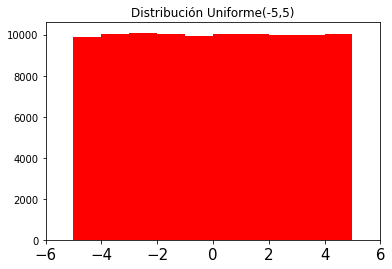

In [ ]:
import numpy as np #solo para crear arreglos "vacios" porque no se puede de manera "natural"
import matplotlib.pyplot as plt

'''
Genera numeros pseudoaleatorios 
distribuidos de manera uniforme
en el intervalo (0,1)
'''
def uniforme_estandar(mult=16807, mod=(2**31)-1, seed = 123456789, size=1):
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1, size):
        x = (x*mult+1)%mod
        U[i] = x/mod
    return U

'''
Genera numeros pseudoaleatorios 
distribuidos de manera uniforme
en el intervalo (a,b)
'''
def uniforme(a=0, b=1, seed= 123456789, size=1):
    return a+(b-a)*uniforme_estandar(seed=seed, size=size)

valores = uniforme(a=-5, b=5, size=100000) #Aqui se puede jugar con el tamaño y el intervalo(a,b)
plt.hist(valores, color="r")
plt.title("Distribución Uniforme(-5,5)")
plt.xticks(fontsize=15)
plt.xlim(-6,6)
plt.show

Observemos que, efectivamente el algoritmo anterior nos ha creado una muestra uniforme de númeoros aleatorios. Esta generación de números pseudoaleatorios mejora entre más grande sea la muestra. Justificado con lo visto en clase:

*A diferencia de los métodos numéricos que se basan en evaluaciones de* $N-puntos$ *en un espacio* $M-dimensional$ *para producir una solución aproximada, los métodos de Monte Carlo tiene un error absoluto con respecto a la aproximación, que decrece conforme N aumenta. Para ser mas exactos decrece a razón de *

$$\frac{1}{\sqrt{N}}$$

*En **teoría** todo método de Monte Carlo converge a la solución exacta, en la **práctica** se consigue una precisión modesta.*

Como observación: las muestras de valores aleatorios se pueden generar con diferentes distribuciones y no únicamente uniformes, sin embargo, el Método de Montecarlo requiere, en su mayoría, de muestras donde los valores sean equiprobables, es decir, donde todos los valores puedan salir por más extraños que parezcan, eso diría que las muestras llegan a ser más representativas.

## Integración con el Método de Montecarlo

Ya que hemos visto que Montecarlo necesita de una muestra representaiva de números aleatorios y que el tamaño de esta muestra es fundamental para obtener mejores aproximaciones, veamos como el tamaño en realidad ayuda en la práctica.

Como hemos visto en clase, para aproximar una integral definida obtenemos la siguiente definición:

*Si seleccionamos los primeros $n$ elementos* $x_{1},x_{2},\ldots,x_{n}$ *de una sucesión aleatoria en el intervalo $(a,b)$, entonces,*

$$\frac{1}{b-a}\int_{a}^{b}f\left(x\right)dx\approx\frac{1}{n}\sum_{i=1}^{n}f\left(x_{i}\right)$$

Pero...¿qué quiere decir esto?
Bueno pues la idea es que generalmente cuando queremos calcular una integral lo que estamos buscando es un área/superficie cuál sea el caso. Y Montecarlo nos dice que esa área es lo mismo que partir el intervalo en $n$ partes y a cada uno de esos intervalitos asignarles una altura ($f(x_i)$) de tal manera que la suma del area de esos rectángulos aproxima el área. Y es importante notar que justamente cuando $n$ es más grande, estos rectangulos son más finos y tenemos más alturas, por lo que la aproximación va siendo más exacta. La diferencia con una suma de Riemman es que en este caso los valores de $x_i$ son valores aleatorios uniformes dentro del intervalo.

## Ley de los Grandes Números y Teorema Central del Límite

Finalmente será importante recordar algunos resultados muy importantes que nos ayudarán a la solución de nuestro problema y que en la vida real tienen un impacto significativo por la cantidad de uso que se le da.

**La Ley de los Grandes Números** fue demostrada por Jacobo Bernoulli hace poco más de 300 años y es uno de los resultados que ha impactado mucho a la comunidad matemática.

Una manera de enunciar esta Ley es la siguiente:

Sea $X_1,X_2,...$ una sucesión de variables aleatorias identicamente distribuidas en independientes con media finita $\mu$. Entonces

$$
\frac{1}{n}\sum_{i=1}^n X_i \to \mu \quad\quad cuando \quad\quad n \to \infty
$$

en donde la convergencia se cumple en el sentido casi seguro (ley fuerte) y también en probabilidad (ley débil)


Este enunciado tiene un sentido muy intuitivo pues es una de las herramientas más utilizadas día a día, y en palabras simples es que si tienes una muestra muy grande de valores, entonces es muy probable que el promedio de esos valores sea el promedio de todos los valores que existen.

O con ejemplo: Si en una ciudad viven 100 personas y tu conoces la estatura de 98 personas, entonces es casi seguro que el promedio de las alturas de esas 98 personas sea el mismo que el promedio de las 100 personas.

La intuición es algo así solo que no podemos pensar específicamente en números "normales", sino en cantidades infinitas.


Finalmente, recordemos a uno de los resultados más importantes de la Teoría de la Probabilidad (si no es que el más importante) y es el **TEOREMA CENTRAL DEL LÍMITE**

Este teorema se puede enunciar de la siguiente manera:

Sean $X_1, X_2, ...$ una sucesión de variables aleatorias, independientes e idénticamente distribuidas de una distribución con media $μ$ y varianza $\sigma^2 \neq 0$. Entonces la variable aleatoria

$$
Z_n = \frac{\sum_{i=1}^{n} X_i - n*\mu}{\sigma*\sqrt{n}}
$$

converge en distribución a la variable aleatoria normal estándar cuando $n \to \infty$. Es decir
$$
P(Z_n < x) \to \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{{-\frac{1}{2}u^2}}du
$$



La grandeza y brillo de este Teorema es que no importa cual sea la distribución de las variables aleatorias, siempre y cuando estas sean i.i.d entonces siempre se podrán aproximar por medio de una variable aleatoria con distribución normal estándar ($N(0,1)$) y eso siempre simplifica mucho las cuentas cuando las distribuciones de las $X_i$ son demasiado complejas, pero más importante aún, existe una relación/conexión entre todas las distribuciones conocidas.

# Aplicación del Método de Montecarlo
Ahora para demostrar que todo lo anterior tiene sentido veamos una aplicación del método de Montecarlo:

## Presentación del problema

Actualmente vivimos en medio de una pandemia, y todos queremos que la pandemia acabe lo antes posible. Una manera de darle fin es vacunándonos. 

A día de hoy ya se ha comenzado a implementar un plan de vacunación en varios países incluyendo México.



<center>

<img src="https://raw.githubusercontent.com/noeam/Simulacion_Montecarlo/main/Imagenes/share-people-fully-vaccinated-covid.png?token=AO4ZTKNGAM7LDCPIVE2JFATAELEX2" width="700">

</center>

Visualización actualizada: [aquí](https://ourworldindata.org/coronavirus-data-explorer?tab=map&zoomToSelection=true&country=CHN~USA~RUS~MEX~DEU~GBR~FRA~ISR~BHR~ARE~IND~ITA&region=World&vaccinationsMetric=true&interval=total&perCapita=true&smoothing=0&pickerMetric=total_vaccinations_per_hundred&pickerSort=desc)



Dentro del Plan Nacional de Vacunación de México se dice que uno de los objetivos específicos es vacunar (inmunizar) mínimo al 70% de la población en México para lograr la inmunidad de rebaño contra el COVID-19.

Según datos del INEGI, la **población de México** es de 126,014,024 personas, por lo que haciendo algunas cuentas secillas

$$
126014024 * 0.7 \approx 88209816.8
$$
Es decir que el 70% de la población equivale a 88,209,817 personas. Por lo que necesitamos que esta cantidad de personas estén vacunadas para poder "vencer" al COVID-19

> Vencer: Retomar las actividades diarias/comunes de manera "normal".


Ahora, veamos algunos otros datos importantes recabados por el proyecto *Our World In Data*.

Estos datos los podemos ver en el siguiente DataFrame, el cual contiene las fechas de los **días activos** de vacunación, y la **cantidad de personas vacunadas** (acumuladas por día) en dichas fechas.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Mexico.csv'
df = pd.read_csv(url)
#print(df.iloc[ -5:, :])
print(df)

   location        date  ... people_vaccinated people_fully_vaccinated
0    Mexico  2020-12-24  ...            2924.0                     NaN
1    Mexico  2020-12-27  ...            6824.0                     NaN
2    Mexico  2020-12-28  ...            9579.0                     NaN
3    Mexico  2020-12-29  ...           18529.0                     NaN
4    Mexico  2020-12-30  ...           24998.0                     NaN
5    Mexico  2021-01-04  ...           43960.0                     NaN
6    Mexico  2021-01-05  ...           48236.0                     NaN
7    Mexico  2021-01-06  ...           53185.0                     NaN
8    Mexico  2021-01-07  ...           58402.0                     NaN
9    Mexico  2021-01-08  ...           67468.0                     NaN
10   Mexico  2021-01-09  ...           74794.0                     NaN
11   Mexico  2021-01-10  ...           81300.0                     NaN
12   Mexico  2021-01-11  ...           87060.0                     NaN
13   M

Es importante observar que la cantidad de personas vacunadas es la cantidad de dosis inyectadas, pero algunas vacunas requieren 2 dosis.

SIN EMBARGO, PARA FINES DE ESTE PROYECTO SUPONDREMOS QUE SOLO SE NECESITA UNA DOSIS PARA INMUNIZAR A UNA PERSONA.

Con lo que si tomamos los datos necesarios obtenemos que:
- Hasta este momento hay **630,820 personas vacunadas**
- Se ha vacunado a todas estas personas en **31 días activos de vacunación**.
- En promedio, **20,350 personas son vacunadas por día**

*(Actualizado al 31 de Enero 2021)*


In [ ]:
#Actualización de los datos anteriores
vacunados = df.iloc[-1,-2]
dias_activos = len(df)
vacunas_por_dia = vacunados/dias_activos
print(f"Los datos muestran que hay {vacunados} personas vacunadas hasta este momento")
print(f"Hasta hoy se contabilizan {dias_activos} días activos de vacunación")
print(f"Actualmente en México se vacunan a un promedio de {vacunas_por_dia} personas por día")

Los datos muestran que hay 630820.0 personas vacunadas hasta este momento
Hasta hoy se contabilizan 31 días activos de vacunación
Actualmente en México se vacunan a un promedio de 20349.032258064515 por día


Con todo esto en mente podemos comenzar a describir y plantear nuestro problema:

Buscamos la probabilidad de que para Enero de 2022 el 70% de la población esté vacunada y podamos "vencer" al COVID-19.

De manera matemática podemos imaginar que cada día es una variable aleatoria $X$, esta variable describe la cantidad de personas vacunadas en ese día.

Para llegar a Enero de 2022 todavía falta casi un año. Haciendo cuentas: 
$$
365-31=334
$$
Faltan 334 días para llegar a 2022,
entonces debemos tomar 334 variables aleatorias, donde cada una representa la cantidad de personas vacunadas en cada día.

Sean $X_1, X_2,..., X_{334}$ la variables aleatorias, observemos que cada $X_i$ puede tomar muchos diferentes valores. En este caso, **supondremos que en un día se vacuna a mínimo 25,000 personas y máximo 100,000**, por lo que $X_i$ toma valores entre $25,000$ y 100,000$ con la misma probabilidad. De manera matemática:

$$
X_i \sim U[25000,100000]
$$

*Justificación: Este problema se puede hacer tan complejo como queramos pues en realidad la cantidad de personas vacunadas por día depende de muchos factores como la fabricación masiva de vacunas que se reparten por todo el mundo, el presupuesto para comprar las vacunas, la cantidad de vacunas que llegan y las fechas de entrega, la capacidad/cantidad de personal que pueda unirse a brigadas de vacunación, entre muchos otros factores más.* 

*Es probable que en los proximos meses, cuando lleguen muchas más vacunas, se puedan aplicar hasta medio millón (o más) de dosis diarias, pero eso vuelve el problema más complejo. Desafortunadamente ahorita los datos son escasos y las intuiciones un poco inseguras.*




## Solución al problema

Ya que sabemos todo lo anterior comencemos a resolver el problema:

Denotemos por $t=88,000,000$ al total de personas que se necesitan vacunar (aproximadamente).

Nos gustaria que el total de vacunados $t$ sean más de $88,000,000$ después de los 334 días, entonces buscamos la siguiente probabilidad:

$$
P(\sum_{i=1}^{334} X_i > t)=?
$$

Si aplicamos el Teorema del Límite Central tenemos que
$$
P(\frac{\sum_{i=1}^{334} X_i - 334*\mu}{\sigma*\sqrt{334}} > \frac{t - 334*\mu}{\sigma*\sqrt{334}})=?
\tag{1}
$$

Donde podemos afirmar que:

$$
Z = \frac{\sum_{i=1}^{334} X_i - 334*\mu}{\sigma*\sqrt{334}}\sim N(0,1)
$$

Y donde $\mu=E[X_i]$ y $\sigma = Var[X_i]=E[X_i^2]-E[X_i]^2$

Pero como sabemos que $X_i \sim U(a,b)$ donde $a=25,000$ y $b=100,000$ entonces:

$$
\mu = E[X_i]=\frac{a+b}{2}=\frac{25,000+100,000}{2}=62,500
$$
$$
\sigma = Var[X_i] = \frac{(b-a)^2}{12}= \frac{(100,000-25,000)^2}{12}=468,750,000
$$

Y sustituyendo en (1) tenemos que:

Sea $p=\frac{t - 334*\mu}{\sigma*\sqrt{n}}$ entonces
$$
p = \frac{88,000,000 - 334*62,500}{2,812,500,000*\sqrt{334}}=2.61707549757358
$$

In [ ]:
import math
n = 334
mu = (25000+100000)/2
var= ((100000-25000)**2)/12
p = (88000000-n*mu)/var*math.sqrt(n)
print("Tenemos que p es", p)

Tenemos que p es 2.61707549757358




Por lo anterior llegamos a que el problema se reduce a calcular la siguiente probabilidad:

$$
R = P(Z>2.61707549757358) = 1-P(Z < 2.61707549757358)
$$

Donde $\frac{1}{\sqrt{2\pi}}e^{{-\frac{1}{2}x^2}}$ es la función de densidad de una variable aleatoria $Z \sim N(0,1)$, por lo que en terminos matemáticos obtenemos que

$$
R = 1 - \int_{-\infty}^{2.61707549757358} \frac{1}{\sqrt{2\pi}}e^{{-\frac{1}{2}x^2}}dx
$$


Esta última integral es muy conocida por su importancia en la Teoria de la Probabilidad pero tambien en el Análisis Matemático pues contiene una complejidad que por si misma es difícil de resolver analíticamente y que por lo general se calcula por medio de tablas y aproximaciones que se han mantenido ha lo largo de los años.

Es aquí donde entra el **Método de Montecarlo**, pues al presentarse una integral de semajante complejidad el método de Montecarlo es muy útil para encontrar una aproximación, pues como hemos visto antes, podemos aproximar esa integral por medio de sumas.

El código queda de la siguiente manera:

**Solución con los métodos escritos en el Desarrollo**

In [ ]:
#Aproximación sin numpy
import math

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarlo(f,N,a,b):
    # area a integrar
    dim = (b-a)	
    # valores aleatorios para								
    a1 = pseudo_uniform(size=N)						
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC											
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        # evaluacion
        temp += f(xr)								
    # aproximacion mediante MC
    return dim*temp/N

mu = 0
sigma = 1
integral = lambda x: (1/math.sqrt(2*math.pi))*(math.e)**((-x**2)/2)

#Tomamos 1000 numeros aleatorios y calculamos la integral de -5 a 2.6170
# el limite inferior es -5 y no -inf  pues para una densidad normal
# la mayor parte del "area" se concentra en (-4,4)
# utilizar -in nos provoca un 
print("La probabilidad es ", 1-MonteCarlo(integral, 100000, -5, 2.6170)) 

La probabilidad es  0.0054385867940823784


**Solución de la integral con numpy**

In [ ]:
#Aproximacion con numpy
import numpy as np
import math

'''Integracion numerica de Monte Carlo
f: funcion a integrar
N: numero de valores aleatorios
a,b,c,d: limites de integracion
'''
def MonteCarlo(f,N,a,b):
    # area a integrar
    dim = (b-a)	
    # valores aleatorios para								
    a1 = np.random.uniform(size=N)						
    # acumulador temporal
    temp = 0
    # ciclo para realizar la suma de MC											
    for i in range(N):
        # valores recorridos
        xr = a1[i]*(b-a)+a
        # evaluacion
        temp += f(xr)								
    # aproximacion mediante MC
    return dim*temp/N

mu = 0
sigma = 1
integral = lambda x: (1/math.sqrt(2*math.pi))*(math.e)**((-x**2)/2)

print("La probabilidad es: ", 1-MonteCarlo(integral, 100000, -5, 2.6170))

La probabilidad es:  0.004860603084765769


### Resultados

La solución por medio de tablas nos dice que:
$$
R = 1-P(Z< 2.61707549757358)=1 - 0.99556 = 0.00444
$$

Por lo tanto **la probabilidad de que para Enero de 2022 el 70% de la población ya este vacunada es de $R=0.00444=0.4\%$.**


¡Una probabilidad muy baja!

Una visualización sencilla de la acumulación de personas vacunadas en los proximos 334 días

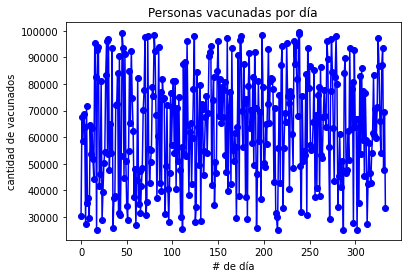

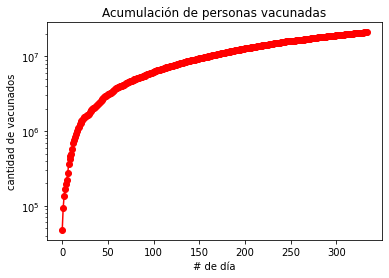

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def grafica_dosis_diarias(N):
    x = np.arange(N)
    y = np.zeros_like(x)
    for i in range(N):
        y[i] = np.random.uniform(25000,100000)
    plt.plot(x,y, "-o", color="b")
    plt.title("Personas vacunadas por día")
    plt.xlabel("# de día")
    plt.ylabel("cantidad de vacunados")
    plt.show()
    
def grafica_acumulada(N):
    x = np.arange(N)
    y = np.zeros_like(x)
    y[0]=np.random.uniform(25000,100000)
    for i in range(1, N):
        y[i] = y[i-1]+np.random.uniform(25000,100000)
    plt.plot(x,y, "-o", color="r")
    plt.title("Acumulación de personas vacunadas")
    plt.xlabel("# de día")
    plt.ylabel("cantidad de vacunados")
    plt.yscale("log")
    plt.show()



grafica_dosis_diarias(334)
grafica_acumulada(334)



#Conclusiones
## Conclusiones del Problema

Es importante hacer enfásis que el problema tiene muchas suposiciones como el hecho de que se pueden vacunar minimo 25,000 personas y máximo 100,000, pero esto en la realidad no es cierto pues ha habido días en los que se vacunan a menos de 5,000 personas por la escases de vacunas que hay. Por otro lado, según lo expuesto por el gobierno, se espera vacunar a más de 100,000 personas diarias por medio de miles de brigadas de vacunación en cuanto lleguen más vacunas en cantidades más grandes a las que han llegado enestos primeros 31 días. 

El problema es realmente complejo, pero creo que la simplificación que he hecho ha cumplido su propósito para mostrar la utilidad del Método de Montecarlo.

## Conclusiones Generales

Aunque el problema es muchísimo más complejo de lo que resolvimos aquí lo importante fue el razonamiento y la aplicación del Teorema del Limite Central y el Método de Montecarlo para estimar probabilidades. Espero que este ejemplo sirva como un pequeño repaso para los que ya saben y un ejemplo entendible para los que recién se adentran en estos temas.

Este trabajo ha servido mucho para asentar conocimientos que se me han presentado este semestre y que considero son fundamentales para la modelación matemática.

# Referencias


1.   [IBM](https://www.ibm.com/cloud/learn/monte-carlo-simulation)
2.   [Our World In Data](https://ourworldindata.org/covid-vaccinations)

3. [Política Nacional de Vacunación](https://coronavirus.gob.mx/wp-content/uploads/2021/01/PolVx_COVID_-11Ene2021.pdf)

4. [INEGI](https://www.inegi.org.mx/temas/estructura/)

5. W. Cheney, D. Kincaid, Métodos Numéricos y Computacion, Sexta Edición
